# Code to create a visualization for a single gap.

In [1]:
import pandas as pd
import datetime as dt
from pyseas.contrib import plot_gap

%matplotlib inline

## Read in the data for the gap for gap_id `d380708e4e604791596e44d64c564f76`

In [2]:
df_gaps = pd.read_csv("data/gaps_data.csv.zip", parse_dates=[2, 3])

#### Get key attributes from the gap

In [3]:
assert(df_gaps.shape[0] == 1)
gap = df_gaps.iloc[0]
gap_id = gap.gap_id
start_date = gap.gap_start
end_date = gap.gap_end
gap_in_ee = gap.gap_in_ee

## Read in the GFW AIS positions for the gap

In [4]:
df_gap_positions_gfw = pd.read_csv("data/gap_positions_gfw.csv.zip", parse_dates=[4])

## Read in the Exact timestampth positions for the gap

This could be any secondary source of positions as long as it is formatted in the same way.

In [5]:
df_gap_positions_ee = pd.read_csv("data/gap_positions_ee.csv.zip", parse_dates=[2])

## Read in the number of hourly pings for the GFW data

## Read in the AIS performance metrics for this vessel

AKA How frequently a vessel's AIS broadcasts with respect to reception quality, averaged over 2019

**Warning: these are very rough, untested performance metrics so use with caution**

In [6]:
df_hourly_gfw = pd.read_csv("data/hourly_gfw.csv.zip", parse_dates=[0])

## Calculate hourly pings for EE (or secondary AIS source) and join to GFW hourly pings

In [7]:
df_performance = pd.read_csv("data/vessel_performance.csv.zip")

In [8]:
if gap_in_ee:
    df_hourly_ee = df_gap_positions_ee.groupby([pd.Grouper(key='timestamp',freq='H'), 'ssvid', 'gap_id']).size().reset_index(name='ee_positions')
    df_hourly_ee['hour'] = df_hourly_ee.timestamp.dt.hour
    df_hourly_ee['date'] = pd.to_datetime(df_hourly_ee.timestamp.dt.date)
    df_hourly_all = df_hourly_gfw.merge(df_hourly_ee, how='outer', on=['date', 'hour', 'ssvid', 'gap_id']).fillna(0, downcast='infer')
    df_hourly_all.drop(columns=['timestamp'], inplace=True)
else:
    df_hourly_all = df_hourly_gfw

# Plotting with *pyseas.plot_gap*

### Plot without attribute table (table_type = 'none')

416000301
d380708e4e604791596e44d64c564f76


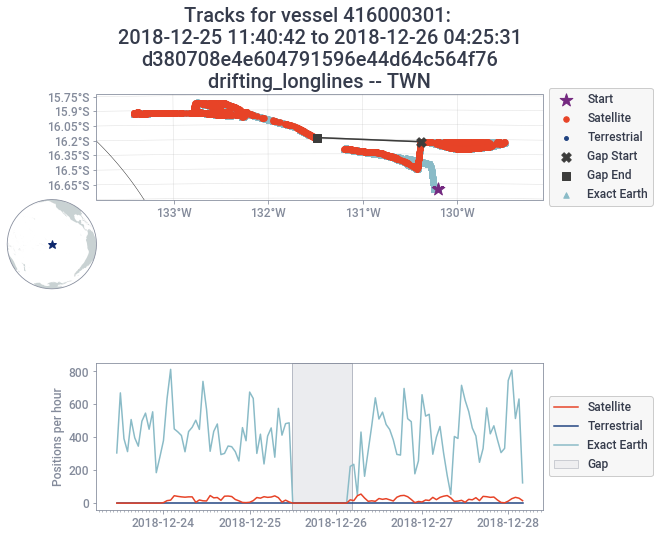

In [9]:
fig, axes = plot_gap.plot_gap(gap_id, gaps_data=df_gaps, hourly_data=df_hourly_all, performance_data=df_performance, \
                                     positions_gfw=df_gap_positions_gfw, positions_ee=df_gap_positions_ee, show_all_gaps=False, \
                                     table_type='none')

### Plot with a simplified attribute table (table_type = 'basic')

This was designed for tracks that do not have Exact Earth (or other secondary AIS) data or when you do not want additional information about the secondary positions.

416000301
d380708e4e604791596e44d64c564f76


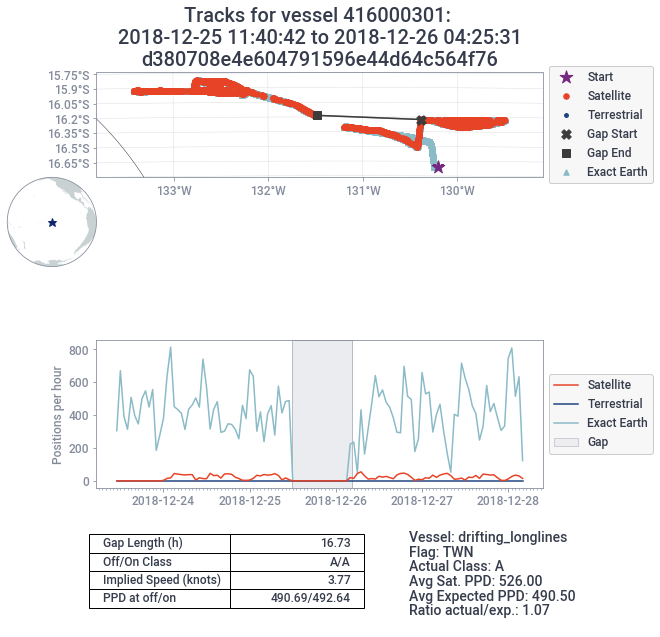

In [10]:
fig, axes = plot_gap.plot_gap(gap_id, gaps_data=df_gaps, hourly_data=df_hourly_all, performance_data=df_performance, \
                                     positions_gfw=df_gap_positions_gfw, positions_ee=df_gap_positions_ee, show_all_gaps=False, \
                                     table_type='basic')

### Plot with a full Exact Earth attribute table (table_type = 'ee')

This was designed for tracks that have Exact Earth data and the user is trying to investigate the gap model.

416000301
d380708e4e604791596e44d64c564f76


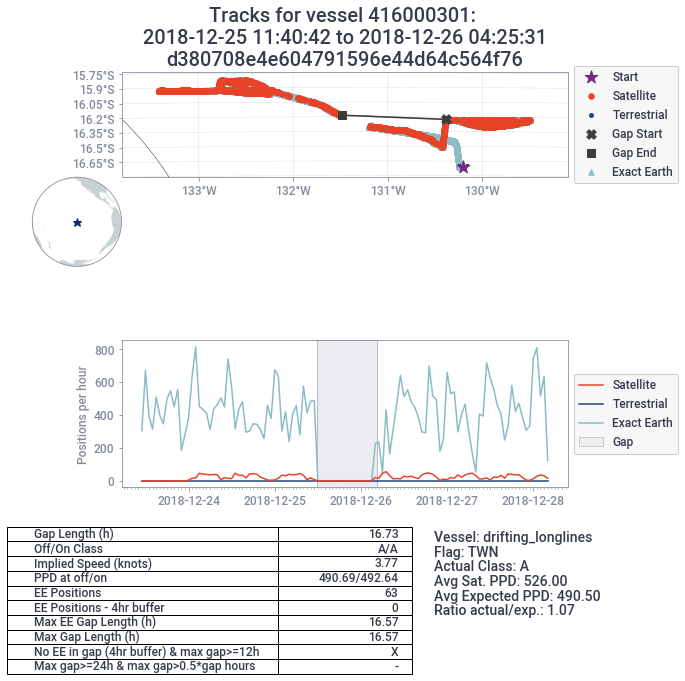

In [11]:
fig, axes = plot_gap.plot_gap(gap_id, gaps_data=df_gaps, hourly_data=df_hourly_all, performance_data=df_performance, \
                                     positions_gfw=df_gap_positions_gfw, positions_ee=df_gap_positions_ee, show_all_gaps=False, \
                                     table_type='ee')

### Remove the Exact Earth data by omitting positions_ee parameter (or explicitly setting to None)

416000301
d380708e4e604791596e44d64c564f76


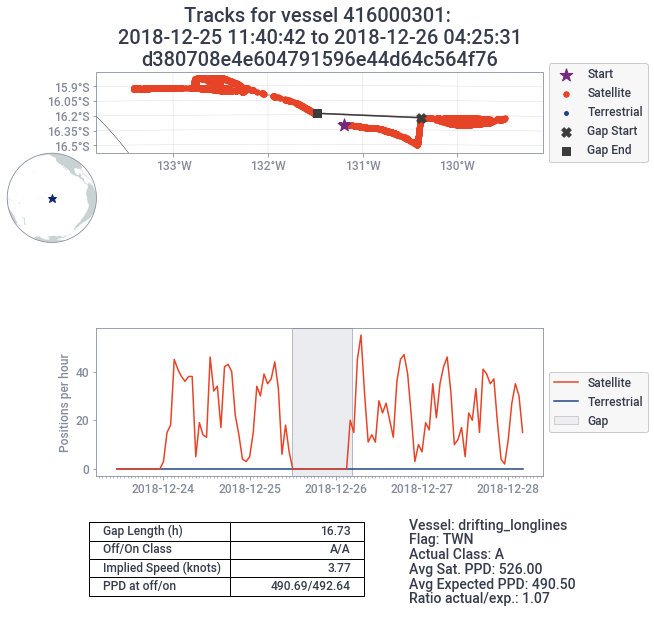

In [12]:
fig, axes = plot_gap.plot_gap(gap_id, gaps_data=df_gaps, hourly_data=df_hourly_all, performance_data=df_performance, \
                                     positions_gfw=df_gap_positions_gfw, show_all_gaps=False, \
                                     table_type='basic')

### Remove performance metrics by omitting performance_data (or explicitly setting to None)

416000301
d380708e4e604791596e44d64c564f76


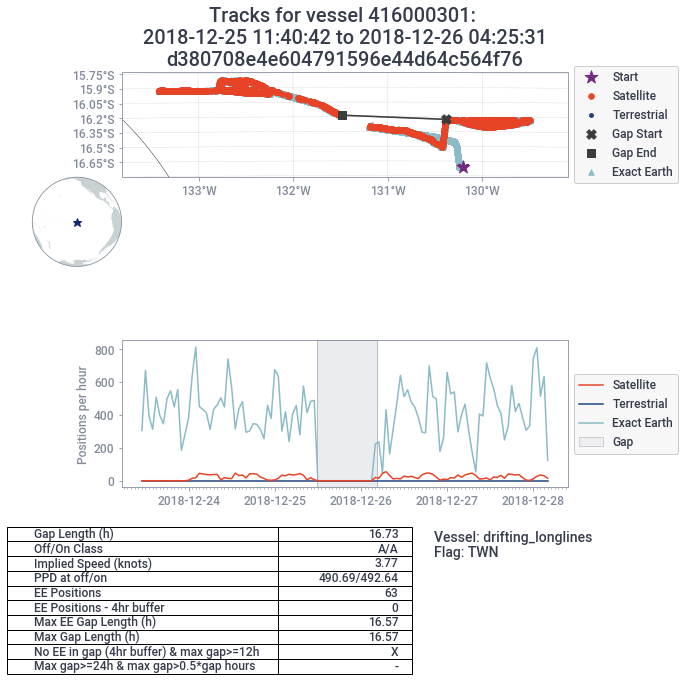

In [13]:
fig, axes = plot_gap.plot_gap(gap_id, gaps_data=df_gaps, hourly_data=df_hourly_all, \
                                     positions_gfw=df_gap_positions_gfw, positions_ee=df_gap_positions_ee, show_all_gaps=False, \
                                     table_type='ee')

### Save to file using *out_filepath*

Note: uncomment out the last portion of the funciton call below to save

416000301
d380708e4e604791596e44d64c564f76


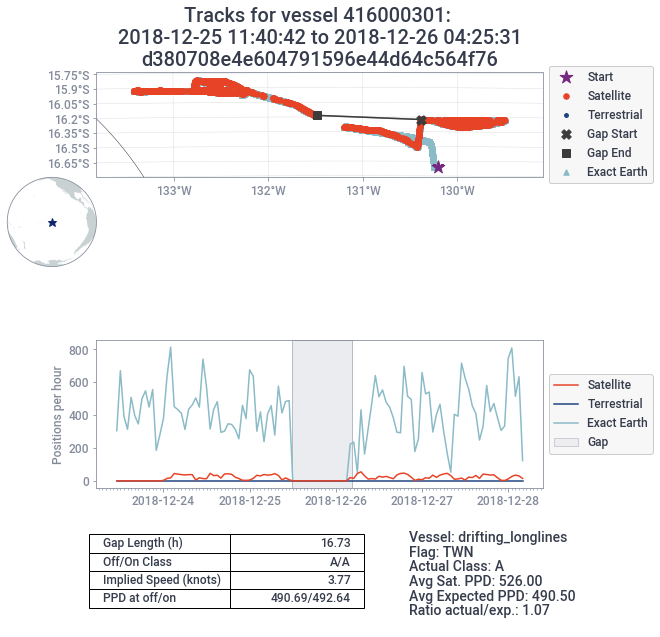

In [14]:
fig, axes = plot_gap.plot_gap(gap_id, gaps_data=df_gaps, hourly_data=df_hourly_all, performance_data=df_performance, \
                                     positions_gfw=df_gap_positions_gfw, positions_ee=df_gap_positions_ee, show_all_gaps=False, \
                                     table_type='basic')#, out_filepath="test.png")